In [1]:
# Домашнее задание по 2 уроку

# Easy
# Скачать данные отсюда (кнопка download all снизу): https://www.kaggle.com/c/titanic/data 
# Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.
# Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

# Normal
# Посчитать по скольким людям нет информации (пола или возраста) Вывести гистограмму по возрасту пассажиров
# Посчитать какой процент мужин и женщин выжили, какой процент детей выжили. 
# Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

# Hard
# Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. 
# Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv 
# Загрузить решение на kaggle. Решение представляет из себя файл с 2 колонками: PassengerId и Survived. 
# Id пассажиров и их данные нужно брать из файла test.csv.

In [4]:
import pandas as pd  # Импортируем pandas

In [3]:
# 1. Задача Easy

In [6]:
titanic = pd.read_csv('./data/train.csv')   # читаем файл в pandas, сохраняем в датафрейме titanic
titanic.head() # выводим файл (первые строки, смотрим, корректно ли)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.count()  # для самопроверки считаем/смотрим данные по всем столбцам, количество заполненных строк по всем столбцам фрейма

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
people_amount = titanic.PassengerId.count()    #чтобы определить % детей, сначала считаем общее число пассажиров по PassengerID, 
# присваиваем значение переменной people_amount
print('Число пассажиров всего, человек = ', people_amount)

Число пассажиров всего, человек =  891


In [7]:
children_passengers = titanic[titanic.Age < 18].PassengerId.count() #считаем общее число пассажиров меньше 18 лет (т.е. детей)
# чтобы потом определить их долю в общем числе пассажиров
print('Число пассажиров младше 18 лет (детей), человек = ', children_passengers)

Число пассажиров младше 18 лет (детей), человек =  113


In [8]:
children_part = children_passengers / people_amount * 100 # определяем отношение числа детей к общему числу пассажиров
print('Доля детей на борту, в %: ', children_part)

Доля детей на борту, в %:  12.682379349046016


In [9]:
# В случае если мужчинами и женщинами мы считаем ВСЕХ лиц мужского и женского пола на борту (независимо от возраста)

In [10]:
male_passengers = titanic[titanic.Sex == 'male'].Sex.count()  # выбираем пассажиров мужского пола и считаем их число
print('Число пассажиров мужского пола, человек = ', male_passengers)

Число пассажиров мужского пола, человек =  577


In [11]:
female_passengers = titanic[titanic.Sex == 'female'].Sex.count()  # выбираем пассажиров женского пола и считаем их количество
print('Число пассажиров женского пола, человек = ', female_passengers)

Число пассажиров женского пола, человек =  314


In [12]:
male_to_female = male_passengers / female_passengers # определяем отношение числа лиц мужского пола к числу лиц женского пола
part_of_male = male_passengers / people_amount * 100 # % пассажиров-мужчин на борту
part_of_female = female_passengers / people_amount * 100 # % пассажиров-женщин на борту
print('Число мужчин на борту превшает число женщин на борту в ', male_to_female, 'раз')
print('Процент мужчин на борту: ', part_of_male, '%')
print('Процент женщин на борту: ', part_of_female, '%')

Число мужчин на борту превшает число женщин на борту в  1.8375796178343948 раз
Процент мужчин на борту:  64.75869809203144 %
Процент женщин на борту:  35.24130190796858 %


In [13]:
# 2. Задача Normal

In [14]:
# Определяем по скольким людям нет информации
# 1 - Вариант  с использованием isnull()

In [15]:
titanic.isnull().sum()  # Смотрим на пропущенные (отсутствующие) данные в датафрейме

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic.isnull().sum().Age # Отражаем количество пропущенных данных по возрасту

177

In [17]:
titanic.isnull().sum().Sex # Отражаем количество пропущенных данных по полу

0

In [18]:
# 2 - Вариант с использованием isna()

In [19]:
titanic.isna()  # можно вывести через isna пропущенные данные и просуммировать их количество по соотв-щим колонкам

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
titanic.isna().sum().Age|titanic.isna().sum().Sex # определяем количество пропущенных данных по столбцам Age и Sex
# Получаем итоговое число

177

<AxesSubplot:>

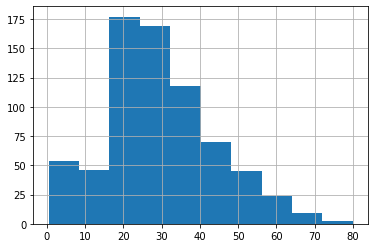

In [21]:
titanic.Age.hist() # Строим гистограмму по возрасту

In [22]:
# Определяем процент выживших мужчин, женщин и детей

In [23]:
# Процент выживших мужчин

In [24]:
surviveddf = titanic[titanic.Survived == 1] # сначала создаем новый датафрейм только с выжившими

In [25]:
male_passengers_alive = surviveddf[surviveddf.Sex == 'male'].Survived.count() # считаем число выживших мужчин в этом датафрейме

In [26]:
male_part_alive = (male_passengers_alive / male_passengers) * 100 # определяем долю выживших мужчин в общем числе мужчин на борту

In [27]:
print('Выжили мужчин:', male_passengers_alive, 'человек')
print('ОТВЕТ - Процент выживших мужчин в общем количестве мужчин составил ', male_part_alive, 'процентов')

Выжили мужчин: 109 человек
ОТВЕТ - Процент выживших мужчин в общем количестве мужчин составил  18.890814558058924 процентов


In [28]:
# Процент выживших женщин

In [29]:
female_passengers_alive = surviveddf[surviveddf.Sex == 'female'].Survived.count() # считаем число выживших женщин

In [30]:
female_part_alive = (female_passengers_alive / female_passengers) * 100 # определяем долю выживших женщин в их общем количестве

In [31]:
print('Выжили женщин:', female_passengers_alive, 'человек')
print('ОТВЕТ - Процент выживших женщин в общем количестве женщин составил ', female_part_alive, 'процентов')

Выжили женщин: 233 человек
ОТВЕТ - Процент выживших женщин в общем количестве женщин составил  74.20382165605095 процентов


In [32]:
# Процент выживших детей

In [33]:
children_passengers_alive = surviveddf[surviveddf.Age < 18].Survived.count() # считаем число выживших детей

In [34]:
children_part_alive = children_passengers_alive / children_passengers * 100 # определяем процент выживших детей
# в их общем количестве

In [35]:
print('Выжили дети:', children_passengers_alive, 'человек')
print('ОТВЕТ - Процент выживших детей в общем количестве детей составил ', children_part_alive, 'процентов')

Выжили дети: 61 человек
ОТВЕТ - Процент выживших детей в общем количестве детей составил  53.98230088495575 процентов


In [36]:
# Определяем корреляцию между возрастом и выживаемостью, между полом и выживаемостью

In [37]:
corr_age_survived = titanic.Age.corr(titanic.Survived)    # Корреляция между возрастом (1й аргумент) 
# и выживаемостью (2ой аргумент)
print('Корреляция между возрастом и выживаемостью составляет ', corr_age_survived)

Корреляция между возрастом и выживаемостью составляет  -0.07722109457217759


In [38]:
male_female_1 = titanic.Sex == 'male'
corr_male_female_1 = male_female_1.corr(titanic.Survived)  # Корреляция между полом и выживаемостю для male
print('Корреляция между полом и выживаемостью составляет ', corr_male_female_1, '(для мужчин)')

Корреляция между полом и выживаемостью составляет  -0.543351380657755 (для мужчин)


In [39]:
male_female_2 = titanic.Sex == 'female'
corr_male_female_2 = male_female_2.corr(titanic.Survived)  # Корреляция между полом и выживаемостю для female
print('Корреляция между полом и выживаемостью составляет ', corr_male_female_2, '(для женщин)')
print('Cоответствует по модулю корреляции между полом и выживаемостью для мужчин (отличается только знак)')

Корреляция между полом и выживаемостью составляет  0.5433513806577551 (для женщин)
Cоответствует по модулю корреляции между полом и выживаемостью для мужчин (отличается только знак)


In [40]:
# 3. Задача Hard
# Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. 

# Первый вариант модели
# Гипотеза для модели исходит из того, что если на борту был мужчина - он скорее всего погиб (т.е. на выходе получаем 0),
# а если женщина - скорее всего выжила (т.е. на выходе будем иметь единицу 1)

In [41]:
titanic_model = pd.read_csv('./data/test.csv')   # читаем файл test.csv в pandas. Данных выжил или нет в этом файле нет,
# сохраняем файл в датафрейм titanic_model
titanic_model.head() # выводим файл (первые строки, смотрим, корректно ли пришли данные)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
def alive(sex):             # Пишем функцию для сопоставления данных по полу с 0 и 1
    if sex == 'male':       # То есть если пол мужской - возвращается 0
        return 0
    else: 
        return 1            # иначе, если пол женский - возвращается 1

In [43]:
# Гипотеза для модели исходит из того, что если на борту был мужчина - он скорее всего погиб (т.е. на выходе получаем 0),
# а если женщина - скорее всего выжила (т.е. на выходе будем иметь единицу 1)

In [44]:
sex_0_or_1 = titanic_model['Sex'].apply(alive) # формируем серию, для того, чтобы включить ее в колонку Survived (вводимую ниже)
# предполагается прямая зависимость между полом и выживаемостью - если мужчина, то погиб (0), если женщина, то выжила (1)

In [45]:
print(sex_0_or_1)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64


In [46]:
titanic_model['Survived'] = sex_0_or_1   # создаем новую колонку в датафрейме titanic_model и отображаем в ней серию sex_0_or_1

In [47]:
titanic_model_itog = pd.DataFrame(titanic_model.PassengerId) # создаем новый датафрейм с ID пассажира

In [48]:
titanic_model_itog.head() # проверяем на всякий случай, как он выглядит

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [49]:
titanic_model_itog['Survived'] = titanic_model.Survived # добавляем в итоговый датафрейм модели столбец с выжившими

In [50]:
titanic_model_itog.head() # смотрим на всякий случай, как он выглядит - получаются 2 колонки с PassengerID и Survived,
# не считая колонки с индексом

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
titanic_model_itog.to_csv('./data/model_itog.csv', index = False)  # сохраняем сформированный датафрейм 
# в файл csv модели model_itog,
# без индекса (поэтому пишем index = False). Файл сохранен в папке data

In [52]:
# На www.kaggle.com файл размещен, точность предсказания 0,7655

In [53]:
# Второй вариант модели Hard
# Гипотеза для модели исходит из того, что если пассажир был в 1 классе - он скорее всего выжил (т.е. на выходе получаем 1),
# а если в 2-3 - скорее всего погиб (т.е. на выходе будем иметь единицу 0)

In [54]:
titanic_model_2 = pd.read_csv('./data/test.csv')   # Для второго варианта модели читаем файл test.csv в pandas. 
# сохраняем файл в датафрейм titanic_model_2
titanic_model_2.head() # выводим файл (первые строки, смотрим, корректно ли пришли данные)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
def alive_class(Pclass):             # Пишем функцию alive_class для сопоставления данных c классом с 0 и 1
    if Pclass == 1:       # То есть если класс каюты 1 - возвращается 1, человек выжил
        return 1
    else: 
        return 0            # иначе возвращается 0, - человек погиб

In [56]:
seclass = titanic_model_2['Pclass'].apply(alive_class) # формируем серию, для того, чтобы включить ее в колонку Survived 
# (вводимую ниже)
# предполагается прямая зависимость между классом и выживаемостью - если класс 1 - то выжил (1), если 2-3, то нет (0)

In [57]:
titanic_model_2['Survived'] = seclass   # создаем новую колонку в датафрейме titanic_model_2 и отображаем в ней серию seclass

In [58]:
titanic_model_itog_2 = pd.DataFrame(titanic_model_2.PassengerId) # создаем новый датафрейм с ID пассажира

In [59]:
titanic_model_itog_2.head() # проверяем на всякий случай, как он выглядит

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [60]:
titanic_model_itog_2['Survived'] = titanic_model_2.Survived # добавляем в итоговый датафрейм модели столбец с выжившими

In [61]:
titanic_model_itog_2.head() # смотрим на всякий случай, как он выглядит - получаются 2 колонки с PassengerID и Survived,
# не считая колонки с индексом

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [62]:
titanic_model_itog_2.to_csv('./data/model_itog_var2.csv', index = False)  # сохраняем сформированный датафрейм 
# в файл csv модели model_itog_2 (второй вариант модели),
# без индекса (поэтому пишем index = False). Файл сохранен в папке data

In [63]:
# На www.kaggle.com файл размещен, точность предсказания 0,67224 (т.е. хуже, чем в варианте 1 модели)